# Filtering colors

---
### Imports and Helper-functions

In [1]:
import os
import random

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def imshow(img, title=None, size=10, axis=False, color_space="BGR"):
    aspect_ratio = img.shape[0] / img.shape[1]
    plt.figure(figsize=(size * aspect_ratio, size))
    if color_space.lower() == "bgr":
        rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    elif color_space.lower() == "rgb":
        rgb_img = img
    else:
        rgb_img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
    plt.imshow(rgb_img)
    if type(title) == str:
        plt.title(title)
    if axis == False:
        plt.axis('off')
    plt.show()

In [9]:
def get_random_img_path(search_path='../../res/img', skip=["flickr"]):
    """
    This function searches for common image files in all subdirectories
    and return a random image path of them.
    """
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.ico']
    image_paths = []

    # Walk through all subdirectories
    for root, dirs, files in os.walk(search_path):
        for file_name in files:
            # Check if the file is an image
            if any(file_name.lower().endswith(ext) for ext in image_extensions):
                # Get the full file path
                full_path = os.path.join(root, file_name).replace("\\", "/")
                if not any(i in full_path for i in skip):
                    image_paths.append(full_path)

    return random.choice(image_paths)

# get an image
IMG_PATH = get_random_img_path(skip=["flickr", "weather", "gem"])
IMG_PATH   

'../../res/img/course_img/view.jpeg'

---
### Loading data

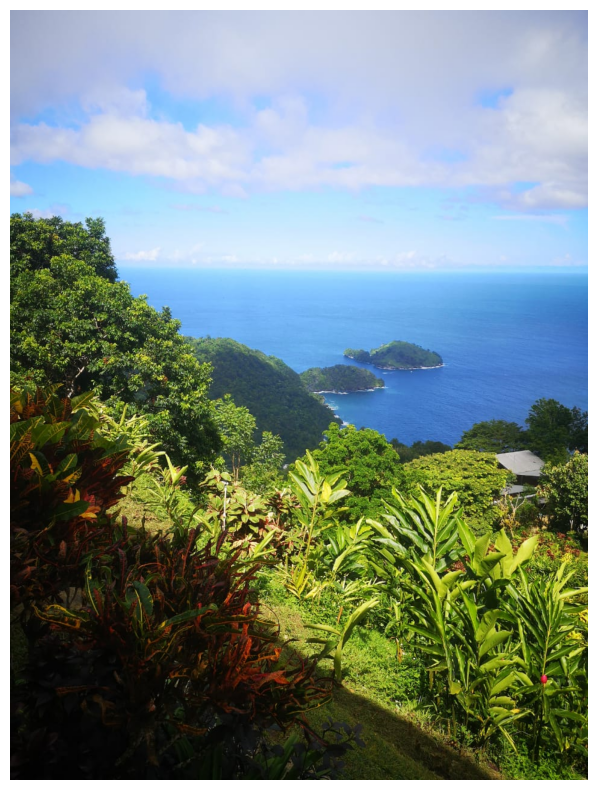

(1280, 960, 3)

In [10]:
img = cv2.imread(IMG_PATH)
imshow(img)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img.shape

---
### HSV Color Filter

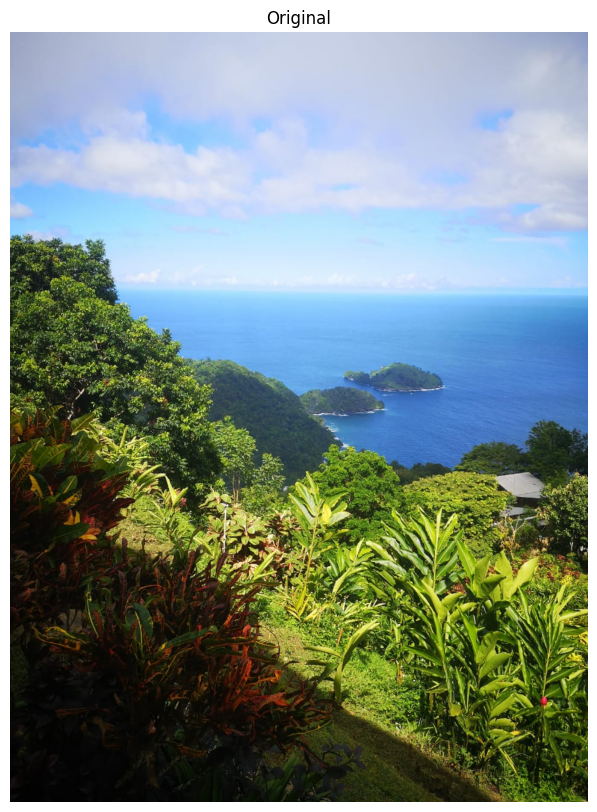

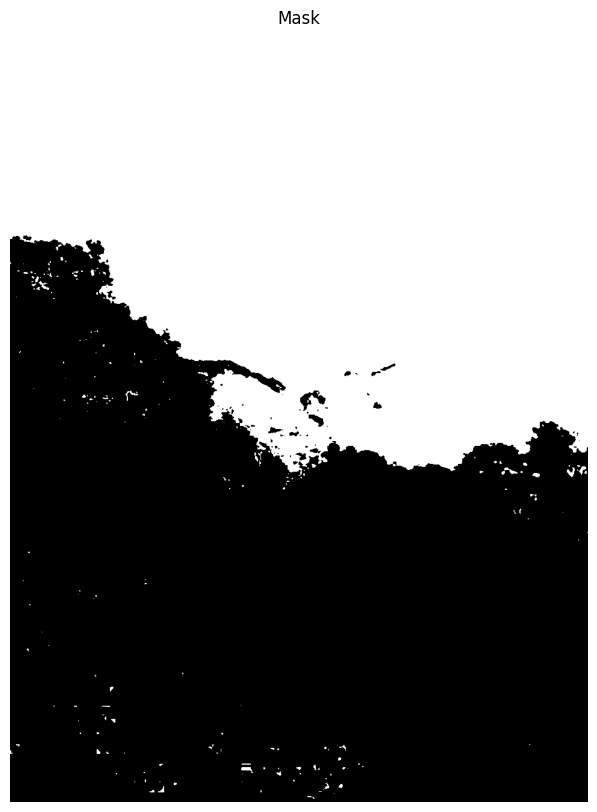

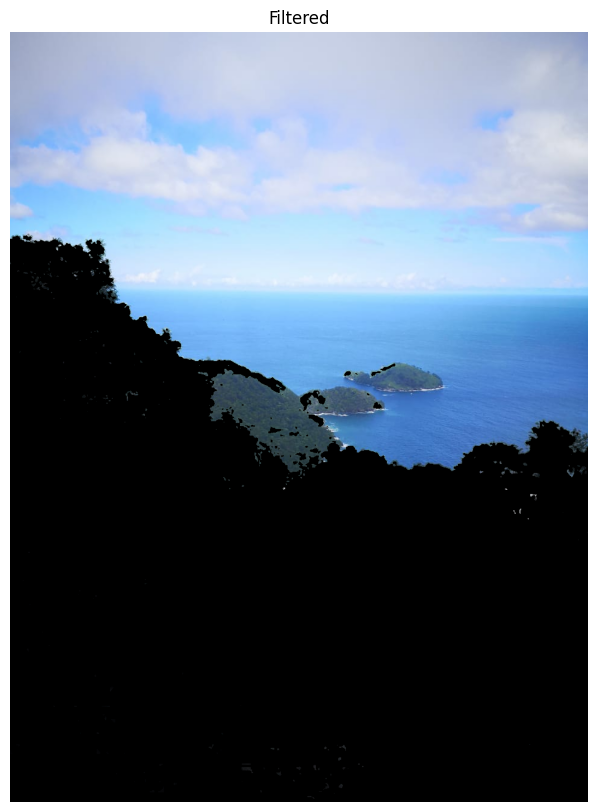

In [19]:
# purple/blue filter
lower = np.array([90, 0, 0])
upper = np.array([135, 255, 255])

hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# apply filter
mask = cv2.inRange(hsv_img, lower, upper)

filtered_img = cv2.bitwise_and(img, img, mask=mask)

imshow(img, "Original")
imshow(mask, "Mask")
imshow(filtered_img, "Filtered")

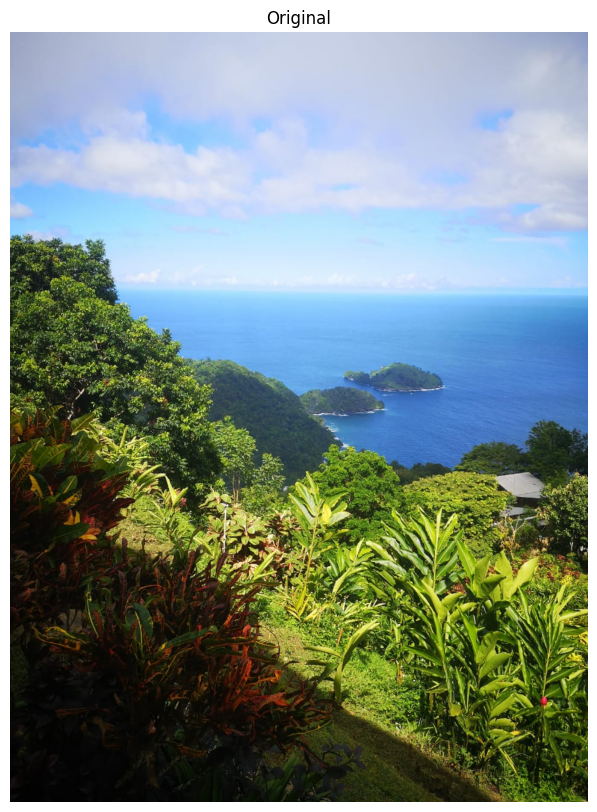

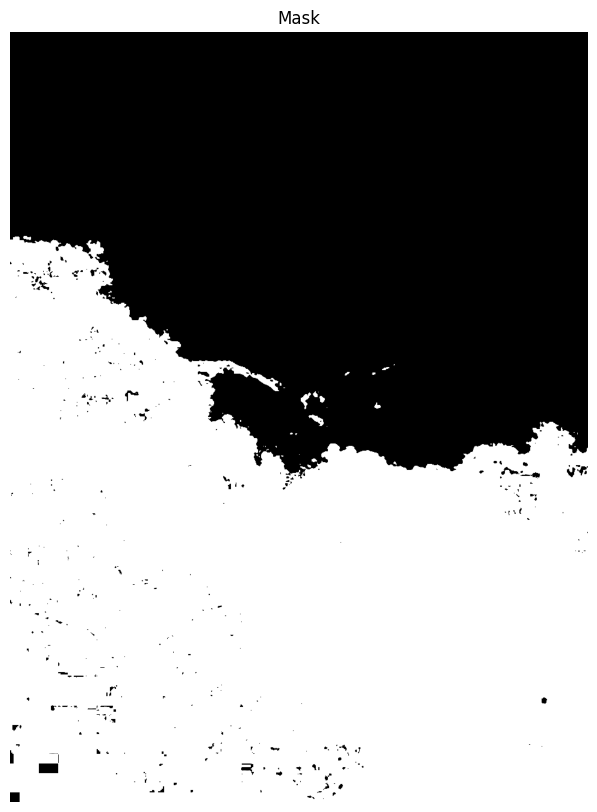

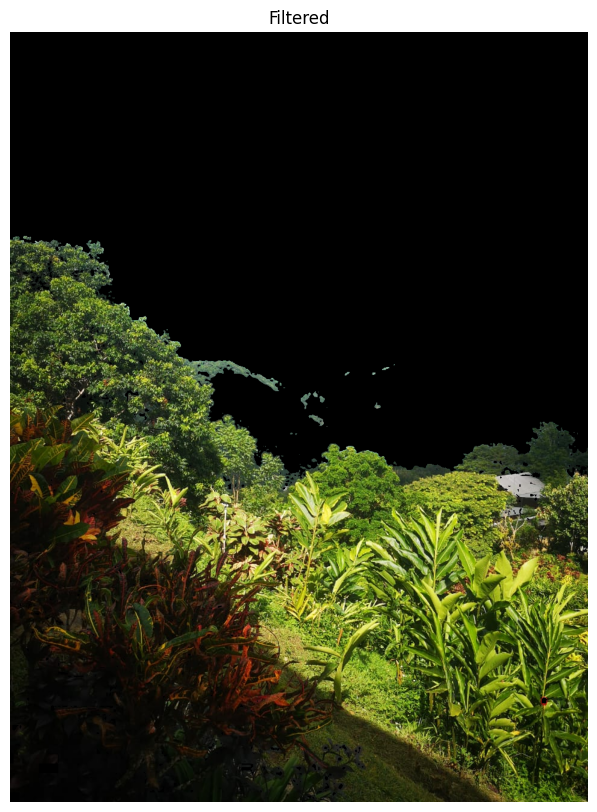

In [22]:
# green/red_oranges filter
lower = np.array([0, 0, 0])
upper = np.array([80, 255, 255])

hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# apply filter
mask = cv2.inRange(hsv_img, lower, upper)

filtered_img = cv2.bitwise_and(img, img, mask=mask)

imshow(img, "Original")
imshow(mask, "Mask")
imshow(filtered_img, "Filtered")

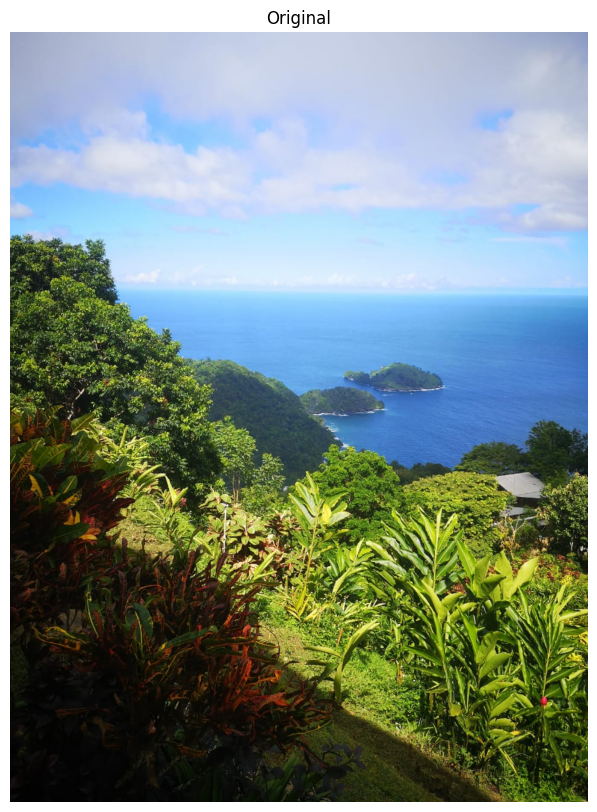

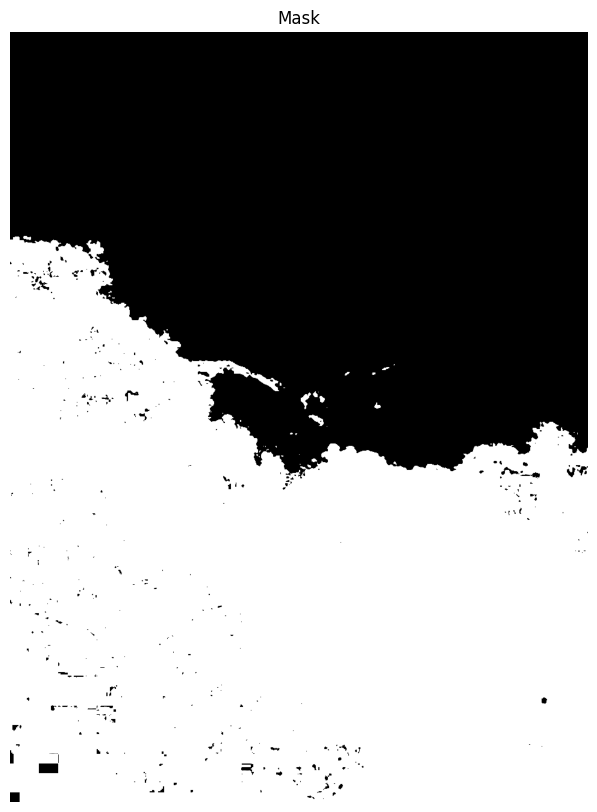

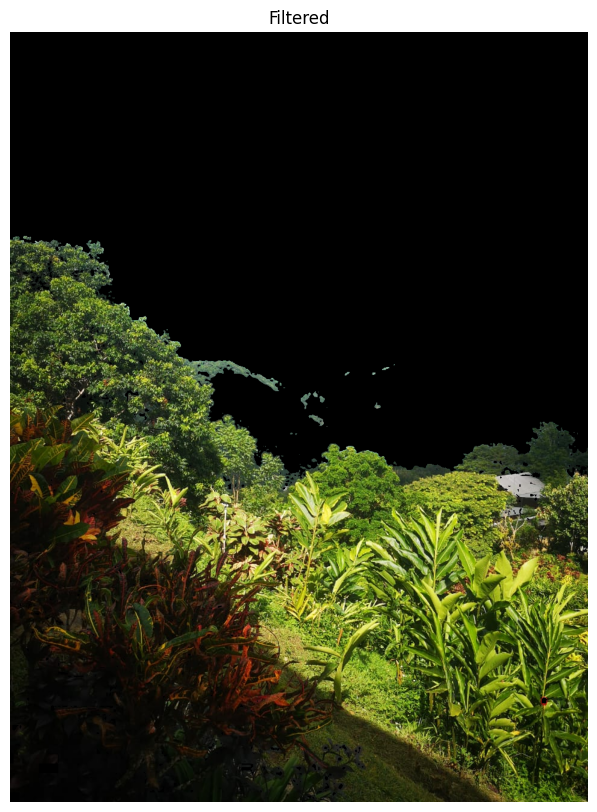

In [23]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#  filter
lower_1 = np.array([0, 0, 0])
upper_1 = np.array([10, 255, 255])
mask_1 = cv2.inRange(hsv_img, lower_1, upper_1)

lower_2 = np.array([170, 0, 0])
upper_2 = np.array([180, 255, 255])
mask_2 = cv2.inRange(hsv_img, lower_2, upper_2)

mask = mask_1 + mask_2

# apply filter
mask = cv2.inRange(hsv_img, lower, upper)

filtered_img = cv2.bitwise_and(img, img, mask=mask)

imshow(img, "Original")
imshow(mask, "Mask")
imshow(filtered_img, "Filtered")

---